In [1]:
import pandas as pd
import numpy as np

# Load CSV
file_path = "data/TurbineGroup2.csv"   # update path if needed
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [2]:
# Check shape
print("Rows:", df.shape[0], "Columns:", df.shape[1])

# Check duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# If you want to view duplicates (do NOT drop yet)
df[df.duplicated()]

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())


Rows: 14310 Columns: 11
Duplicate rows: 7

Missing values per column:
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


In [3]:
# Basic descriptive statistics
summary = df.describe().T
summary


,count,mean,std,min,25%,50%,75%,max
AT,14310.0,17.909974,6.935813,0.28985,12.467500,17.67800,23.41850,34.1890
AP,14310.0,1012.192015,6.136508,989.38000,1008.200000,1011.90000,1016.10000,1031.4000
AH,14310.0,81.303128,13.599895,25.98700,72.437250,84.28850,92.16050,100.1900
AFDP,14310.0,3.805274,0.767639,2.15170,3.250500,3.80455,4.20030,6.9779
GTEP,14310.0,25.423679,4.043840,17.93900,22.931000,25.07500,26.77200,36.9500
TIT,14310.0,1080.202586,17.038717,1002.90000,1068.500000,1083.20000,1094.20000,1100.9000
TAT,14310.0,546.709959,6.209894,511.04000,546.240000,549.91000,550.04000,550.6000
TEY,14310.0,132.538315,15.041731,100.03000,122.540000,133.53000,136.92000,172.9600
CDP,14310.0,11.997733,1.044559,9.85180,11.328250,11.92550,12.39275,14.8670
CO,14310.0,2.401932,2.215921,0.00164,1.253725,1.70665,2.62500,35.0450


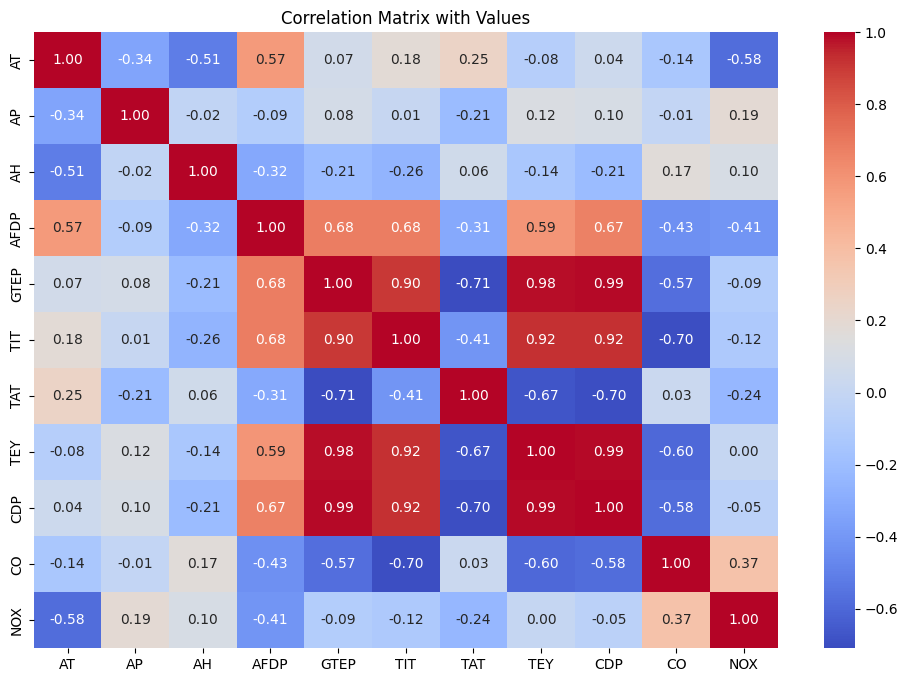

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations for numeric columns
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr.round(2), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Values")
plt.show()


Correlation of NOX with other parameters (descending):
CO      0.371760
AP      0.187986
AH      0.096576
TEY     0.000064
CDP    -0.054180
GTEP   -0.089365
TIT    -0.124142
TAT    -0.236343
AFDP   -0.406751
AT     -0.576477
Name: NOX, dtype: float64


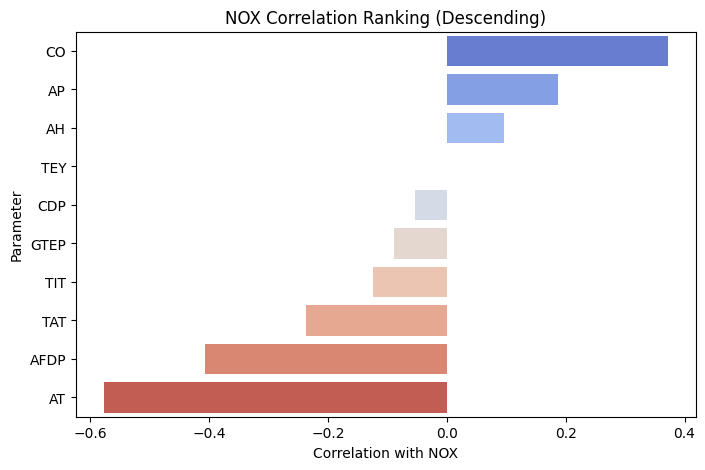

In [5]:
# Compute correlations with NOX
corr_series = df.corr(numeric_only=True)['NOX'].drop('NOX').sort_values(ascending=False)

# Display ranked correlations
print("Correlation of NOX with other parameters (descending):")
print(corr_series)

# Plot with fixed Seaborn syntax
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_series.values,
    y=corr_series.index,
    hue=corr_series.index, 
    palette="coolwarm",
    legend=False
)
plt.title("NOX Correlation Ranking (Descending)")
plt.xlabel("Correlation with NOX")
plt.ylabel("Parameter")
plt.show()

| Parameter           | Corr(NOₓ) | Meaning                                                                                 |
| ------------------- | --------- | --------------------------------------------------------------------------------------- |
| **CO**              | +0.37     | Both emissions rise under hot, lean conditions → keep only for comparison, not modeling |
| **AP**              | +0.19     | Slight increase in NOₓ at higher ambient pressure                                       |
| **AH**              | +0.10     | Weak positive link, humidity slightly raises flame temp here                            |
| **TEY**             | ≈0.00     | Load alone doesn’t determine NOₓ when temps already included                            |
| **CDP → AFDP → AT** | Negative  | As inlet pressure rises or air is cooler/cleaner, NOₓ drops                             |


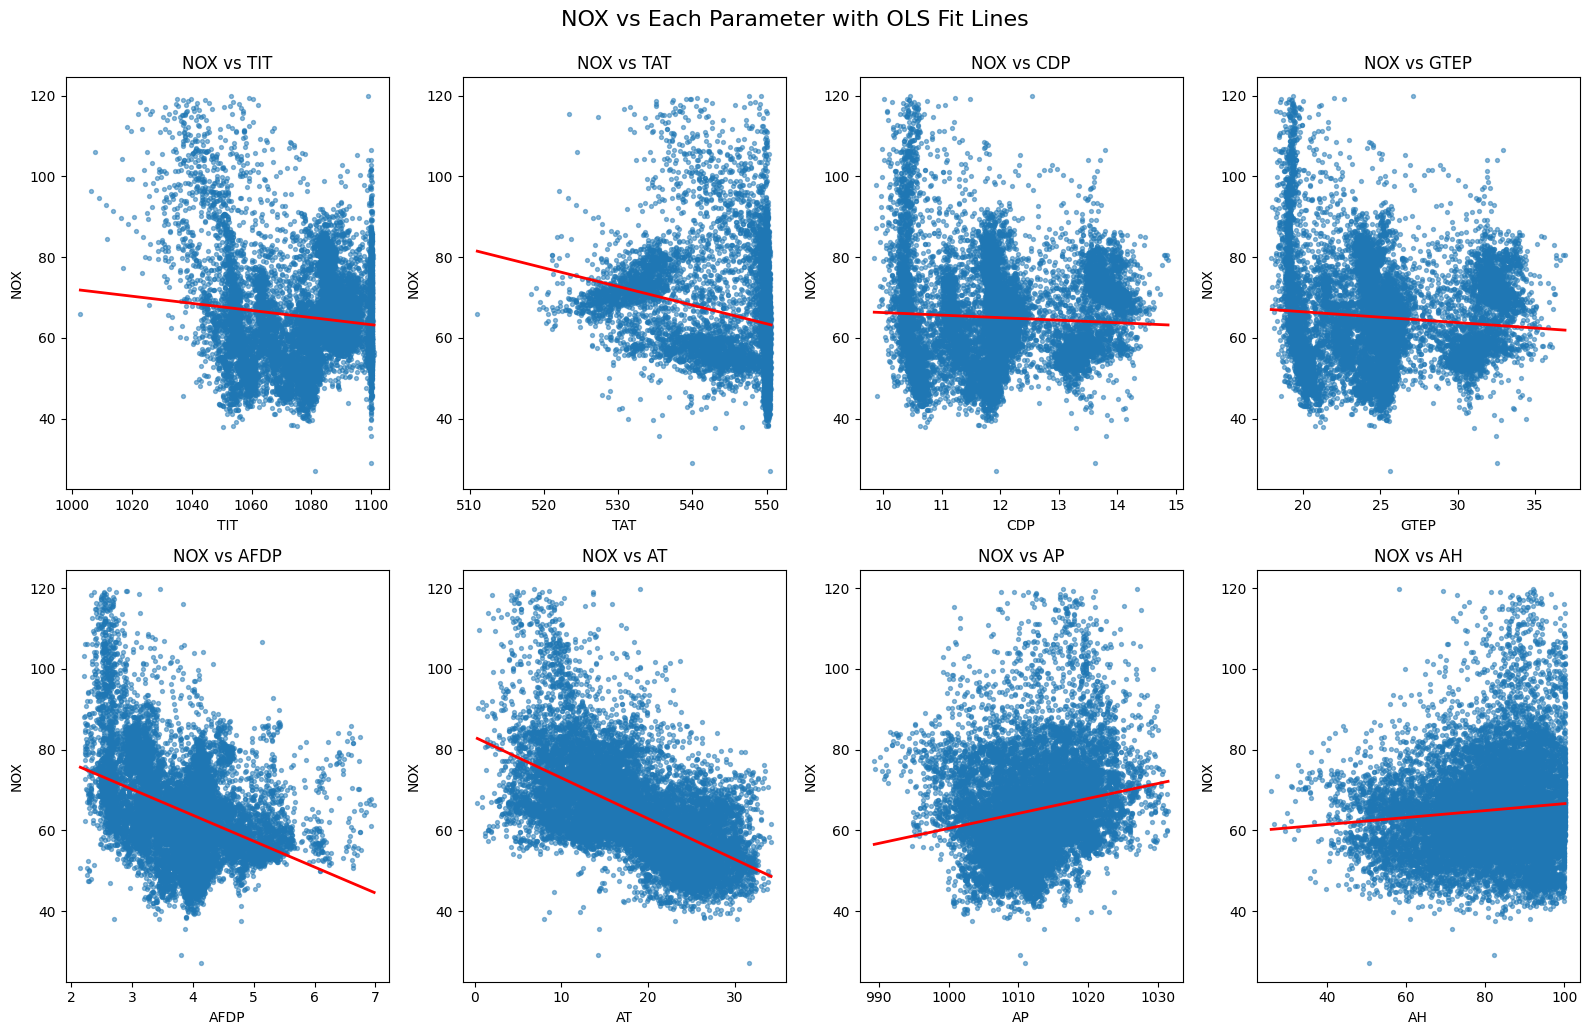

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# List of predictor variables (exclude CO)
vars_to_plot = ['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH']

plt.figure(figsize=(16, 10))

for i, col in enumerate(vars_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.regplot(
        x=col,
        y='NOX',
        data=df,
        scatter_kws={'s': 8, 'alpha': 0.5},
        line_kws={'color': 'red', 'lw': 2},
        ci=None
    )
    plt.title(f'NOX vs {col}')
    plt.xlabel(col)
    plt.ylabel('NOX')

plt.tight_layout()
plt.suptitle("NOX vs Each Parameter with OLS Fit Lines", fontsize=16, y=1.03)
plt.show()


| Variable                  | Trend vs NOx    | Linearity                       | Interpretation                                                           |
| ------------------------- | --------------- | ------------------------------- | ------------------------------------------------------------------------ |
| **AT (Ambient Temp)**     | Strong negative | Clearly linear                  | Cooler air increases density → better combustion → lower NOx.            |
| **AP (Ambient Pressure)** | Mild positive   | Roughly linear                  | Higher pressure slightly raises NOx via higher flame temp.               |
| **AH (Humidity)**         | Weak positive   | Weakly linear                   | More humid air adds water vapor → minor NOx rise.                        |
| **AFDP (Filter ΔP)**      | Negative        | Partly linear but wider scatter | Some linearity, but mechanical/maintenance effects dominate.             |
| **TIT, TAT, CDP, GTEP**   | Weak or noisy   | Non-linear / multicluster       | Influenced by load band changes; single global fit flattens the pattern. |

Conclusion:
For the global model: linear signals come mainly from AT, AP, AH.
For finer turbine behavior: you’ll need band-wise models to reveal the hidden (non-linear) relationships of TIT, CDP, AFDP, etc.

In [8]:
for col in ['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH']:
    X = sm.add_constant(df[col])
    model = sm.OLS(df['NOX'], X).fit()
    r2 = model.rsquared
    print(f"{col}: R² = {r2:.3f}")

TIT: R² = 0.015
TAT: R² = 0.056
CDP: R² = 0.003
GTEP: R² = 0.008
AFDP: R² = 0.165
AT: R² = 0.332
AP: R² = 0.035
AH: R² = 0.009


Only AT and AFDP have real linear effects; others vary by regime (nonlinear or interaction-based).

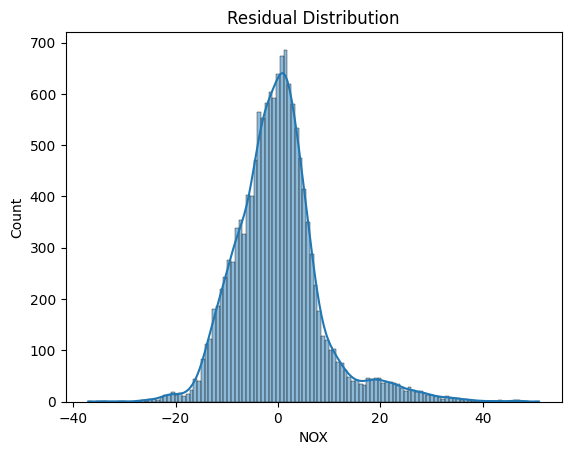

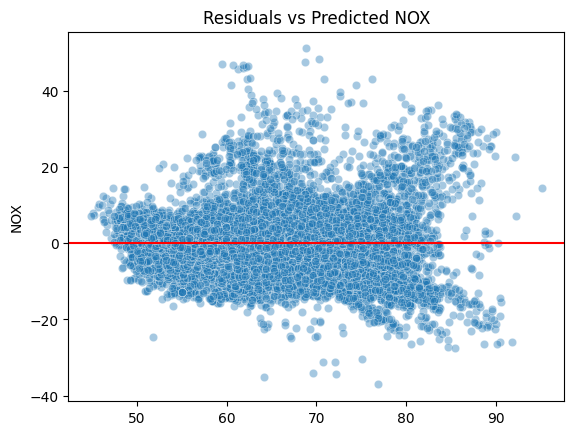

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted NOX")
plt.show()


1. Residual Distribution

- Centered near zero → no overall bias.

- Slight skew and long tails → model underfits at extremes.

- Indicates that linear model misses nonlinear behavior under certain load/ambient states.

2. Residuals vs Predicted Plot

- Clear curved and funnel-shaped pattern.

- Variance increases with predicted NOx → heteroskedasticity.

- Not random scatter ⇒ linear model doesn’t capture all structure.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_const = sm.add_constant(X)
vif = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
})
print(vif)


  Variable         VIF
0      TIT   34.051543
1      TAT    8.276848
2      CDP  306.474558
3     GTEP  102.116323
4     AFDP    4.331631
5       AT   11.759552
6       AP    1.385009
7       AH    1.617526
8      TEY  270.845380


| Variable | VIF                                  | Meaning |
| -------- | ------------------------------------ | ------- |
| CDP 306  | → CDP tightly coupled with TIT & TEY |         |
| TEY 271  | → Load dominates other variables     |         |
| GTEP 102 | → Strong correlation with CDP & TIT  |         |
| TIT 34   | → Highly correlated with others      |         |

VIF > 10 means redundant features; here it’s severe.
These are physically coupled through turbine thermodynamics — the linear model can’t separate their effects reliably.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
r2_rf = r2_score(y, rf.predict(X))

print("R² Linear:", model.score(X, y))
print("R² Random Forest:", r2_rf)


R² Linear: 0.5090344017552361
R² Random Forest: 0.9830241561208706


| Finding                      | Evidence                 | Implication                              |
| ---------------------------- | ------------------------ | ---------------------------------------- |
| Weak individual R²           | <0.3 for all but AT      | Most predictors act through interactions |
| Nonrandom residuals          | Curved & heteroskedastic | Linearity assumption violated            |
| High VIFs                    | >100 for some            | Strong multicollinearity                 |
| Random Forest R² ≫ Linear R² | 0.98 vs 0.51             | Nonlinear patterns dominate              |


In [24]:
# --------------------------------------------
# STEP 1: Prepare data (drop CO, keep others)
# --------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error

# Define predictors and target
X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------
# STEP 2: Fit Ridge and Lasso models
# --------------------------------------------
ridge = Ridge(alpha=0.05, random_state=42)
lasso = Lasso(alpha=0.05, random_state=42, max_iter=5000)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# --------------------------------------------
# STEP 3: Evaluate performance
# --------------------------------------------
ridge_r2 = r2_score(y_test, ridge.predict(X_test_scaled))
lasso_r2 = r2_score(y_test, lasso.predict(X_test_scaled))

ridge_mae = mean_absolute_error(y_test, ridge.predict(X_test_scaled))
lasso_mae = mean_absolute_error(y_test, lasso.predict(X_test_scaled))

print(f"Ridge  -> R²: {ridge_r2:.3f},  MAE: {ridge_mae:.3f}")
print(f"Lasso  -> R²: {lasso_r2:.3f},  MAE: {lasso_mae:.3f}")

# --------------------------------------------
# STEP 4: Coefficient comparison
# --------------------------------------------
import pandas as pd
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Ridge Coef': ridge.coef_,
    'Lasso Coef': lasso.coef_
}).sort_values(by='Ridge Coef', ascending=False)

display(coef_df)


Ridge  -> R²: 0.506,  MAE: 6.005
Lasso  -> R²: 0.503,  MAE: 6.042


,Variable,Ridge Coef,Lasso Coef
0,TIT,16.180547,12.243694
2,CDP,3.383595,-0.000000
4,AFDP,-0.545639,-0.733101
6,AP,-1.057344,-0.803862
7,AH,-2.965992,-2.817453
3,GTEP,-7.988074,-9.894835
1,TAT,-8.769686,-8.069811
5,AT,-10.199935,-8.328742
8,TEY,-17.122866,-7.552692


1. Ridge and Lasso stabilized coefficients but didn’t improve explanatory power (R² ≈ 0.50).

2. This confirms the primary limitation is nonlinear dependence among parameters, not multicollinearity.

3. We therefore advance to nonlinear modeling (Random Forest/XGBoost) to capture realistic turbine behavior.

4. The physics of turbine combustion creates interaction surfaces: NOx changes when pairs of variables move together (e.g., TIT × AFDP, TEY × AT).

(basically check for interaction terms, then redo the modelling)

Polynomial Regression (Degree 3) -> R²: 0.808,  MAE: 3.480

Top 15 Most Influential Polynomial Terms:


,Feature,Coefficient,Abs_Coefficient
62,TIT^2 TEY,-2.387818e+06,2.387818e+06
70,TIT TAT TEY,2.257520e+06,2.257520e+06
64,TIT TAT CDP,-1.177705e+06,1.177705e+06
9,TIT^2,-1.040572e+06,1.040572e+06
17,TIT TEY,9.788297e+05,9.788297e+05
54,TIT^3,9.531247e+05,9.531247e+05
56,TIT^2 CDP,8.981458e+05,8.981458e+05
65,TIT TAT GTEP,-8.168214e+05,8.168214e+05
10,TIT TAT,6.591635e+05,6.591635e+05
55,TIT^2 TAT,-6.284959e+05,6.284959e+05


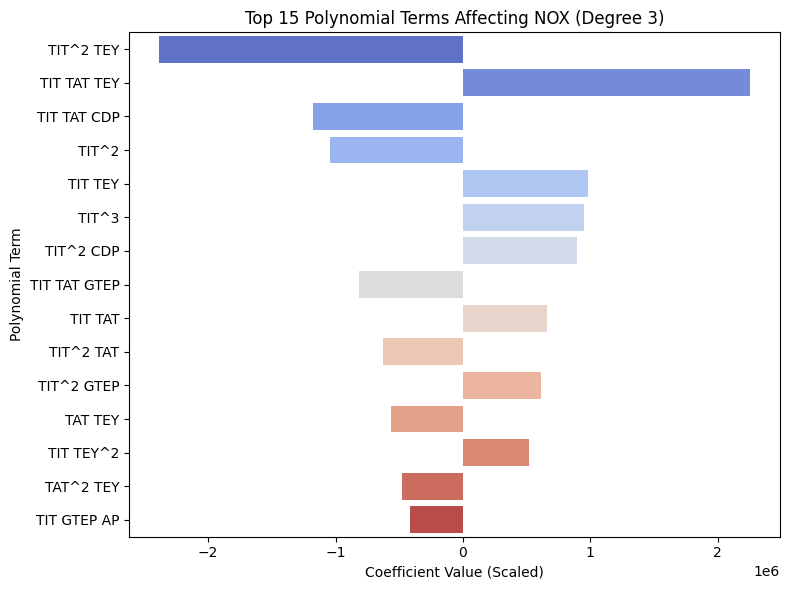

In [27]:
# --------------------------------------------
# Polynomial Regression (Degree = 3) + Feature Importance
# --------------------------------------------
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------
# STEP 1: Prepare data
# --------------------------------------------
X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------
# STEP 2: Polynomial transformation (degree 3)
# --------------------------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# --------------------------------------------
# STEP 3: Scaling
# --------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# --------------------------------------------
# STEP 4: Fit Polynomial Regression
# --------------------------------------------
poly_model = LinearRegression()
poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_test_scaled)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree 3) -> R²: {r2_poly:.3f},  MAE: {mae_poly:.3f}")

# --------------------------------------------
# STEP 5: Feature Importance Ranking
# --------------------------------------------
# Get feature names and coefficients
feature_names = poly.get_feature_names_out(X.columns)
coefs = poly_model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 15 Most Influential Polynomial Terms:")
display(coef_df.head(15))

# --------------------------------------------
# STEP 6: Visualization of Top Terms
# --------------------------------------------
top_terms = coef_df.head(15)
plt.figure(figsize=(8,6))
sns.barplot(
    y='Feature',
    x='Coefficient',
    data=top_terms,
    hue='Feature',           # <-- required for palette
    palette='coolwarm',
    dodge=False,
    legend=False             # <-- hide unnecessary legend
)
plt.title("Top 15 Polynomial Terms Affecting NOX (Degree 3)")
plt.xlabel("Coefficient Value (Scaled)")
plt.ylabel("Polynomial Term")
plt.tight_layout()
plt.show()



| Rank | Feature              | Sign | Interpretation                                                                                                               |
| ---- | -------------------- | ---- | ---------------------------------------------------------------------------------------------------------------------------- |
| 1    | **TIT² × TEY**       | −    | When both TIT and TEY rise, NOx falls after a curvature point — a **nonlinear negative relationship** between heat and load. |
| 2    | **TIT × TAT × TEY**  | +    | Combined rise in inlet/exhaust temp and load **increases NOx** — classic high-load, hot-combustion zone.                     |
| 3    | **TIT × TAT × CDP**  | −    | At higher compressor pressure and hot temps, NOx **drops slightly**, likely improved mixing.                                 |
| 4    | **TIT²**             | −    | Pure TIT curvature — NOx rises then falls after a temperature threshold (nonlinear temperature effect).                      |
| 5    | **TIT × TEY**        | +    | Straight interaction: at higher loads, increasing TIT increases NOx.                                                         |
| 6    | **TIT³**             | +    | Confirms **nonlinear sensitivity** to TIT — small changes in TIT at extremes have big emission impact.                       |
| 7    | **TIT² × CDP**       | +    | High TIT and high compressor discharge pressure **boost NOx**.                                                               |
| 8    | **TIT × TAT × GTEP** | −    | When both exhaust pressure and temperature rise, NOx slightly drops (may reflect flow restriction compensation).             |
| 9    | **TIT × TAT**        | +    | Basic linear combo — hotter turbine both sides increases NOx.                                                                |
| 10   | **TIT² × TAT**       | −    | Curved term: after certain TAT, further TIT rise lowers NOx.                                                                 |


#### Every top term involves TIT and TEY — they dominate NOx behavior, confirming the turbine’s heat-load coupling is the main driver.

* Polynomial regression found that **temperature–load interactions** (`TIT`, `TAT`, `TEY`) explain most of the curvature that linear models missed.

* Ambient variables didn’t appear among top terms → they act mostly as baseline shifts, not dominant nonlinear drivers.

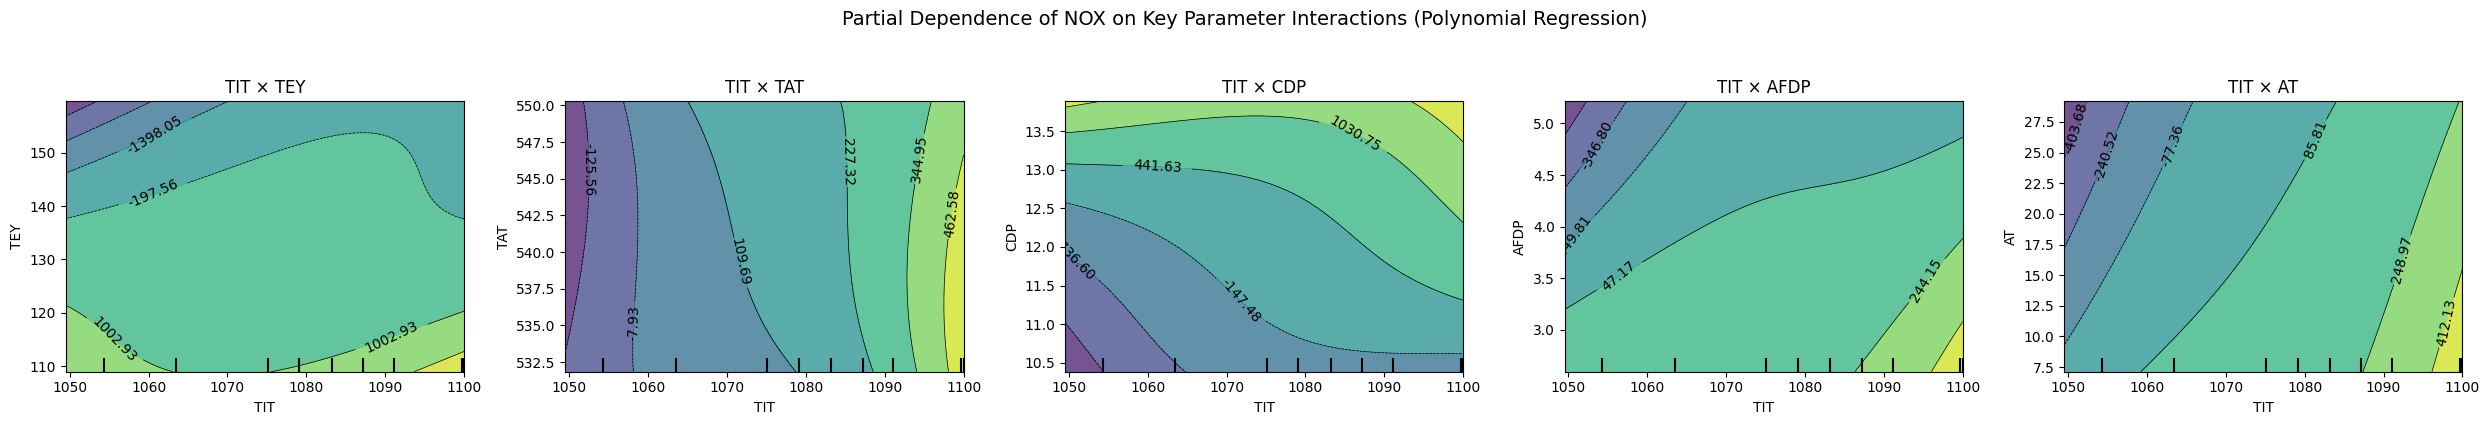

In [29]:
# --------------------------------------------
# Partial Dependence for Top Interactions (Fixed Version)
# --------------------------------------------
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define your top pairs manually or from coef_df
top_terms_to_plot = [
    ('TIT', 'TEY'),
    ('TIT', 'TAT'),
    ('TIT', 'CDP'),
    ('TIT', 'AFDP'),
    ('TIT', 'GTEP'),
]

# Build polynomial model pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

model_poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
model_poly_pipeline.fit(X, y)

# --------------------------------------------
# Plot multiple PDPs in a single large figure
# --------------------------------------------
n_plots = len(top_terms_to_plot)
fig, axes = plt.subplots(1, n_plots, figsize=(5 * n_plots, 4))

if n_plots == 1:
    axes = [axes]  # make iterable if single plot

for ax, pair in zip(axes, top_terms_to_plot):
    display = PartialDependenceDisplay.from_estimator(
        model_poly_pipeline,
        X,
        features=[pair],
        ax=ax,
        kind='average'
    )
    ax.set_title(f"{pair[0]} × {pair[1]}")

plt.suptitle("Partial Dependence of NOX on Key Parameter Interactions (Polynomial Regression)", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


| Plot           | Plain-language meaning                                                                                          |
| -------------- | --------------------------------------------------------------------------------------------------------------- |
| **TIT × TEY**  | When the turbine runs hotter **and** under more load, NOx goes up — but only to a point, then levels off.       |
| **TIT × TAT**  | Changing exhaust temperature alone doesn’t do much; TIT is what really drives NOx here.                         |
| **TIT × CDP**  | High inlet temperature and high compressor pressure together push NOx higher.                                   |
| **TIT × AFDP** | When the air filter gets more clogged (higher AFDP), NOx drops a bit — less air, cooler burn.                   |
| **TIT × AT**   | On hotter days (high AT), the same TIT causes higher NOx because the air is thinner and combustion gets hotter. |


Color: how much NOx the model thinks you’ll get there.

Yellow / green → higher NOx

Blue / purple → lower NOx

| Model                                       | Why it fits this problem                                                             | What insight you get                                         |
| ------------------------------------------- | ------------------------------------------------------------------------------------ | ------------------------------------------------------------ |
| **Random Forest Regressor**                 | Handles nonlinear, interaction-heavy data without scaling; gives feature importance. | Tells which variables or pairs most reduce prediction error. |
| **XGBoost / LightGBM (Gradient Boosting)**  | More precise and tunable version of forests; often best R² with modest data.         | Can show “partial dependence” and “SHAP” effects cleanly.    |
| **Support Vector Regressor (RBF kernel)**   | Fits smooth nonlinear surfaces with fewer parameters; good check for smooth trends.  | Verifies curvature captured by boosting models.              |
| **Neural Network (Multi-layer Perceptron)** | Learns any nonlinear pattern but needs tuning and regularization.                    | Useful only if tree models plateau; less transparent.        |


           Model        R²       MAE
0  Random Forest  0.846685  2.934674
1        XGBoost  0.862035  2.713940


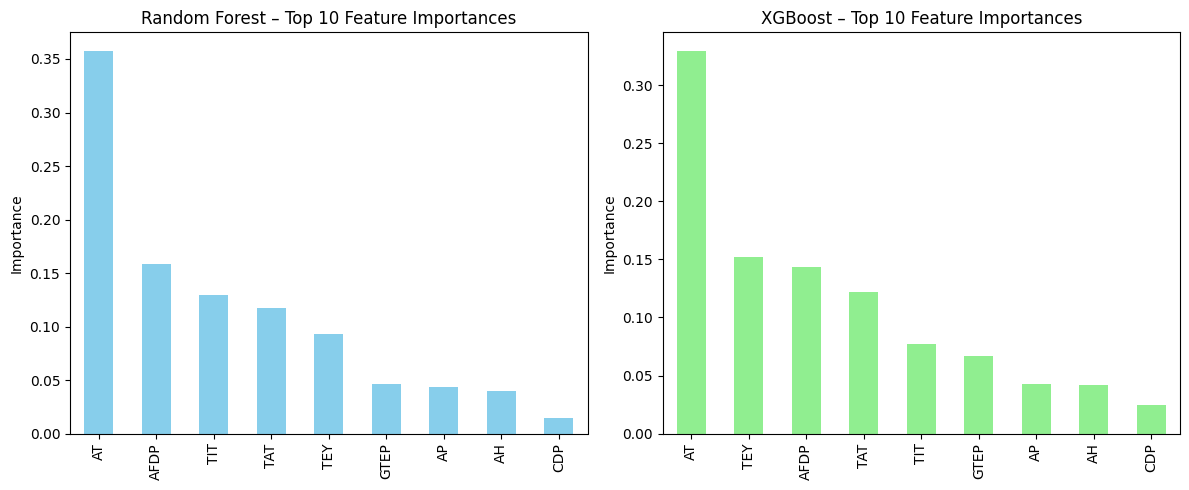

,Feature,RF Importance,XGB Importance
5,AT,0.357048,0.328914
4,AFDP,0.158301,0.143576
0,TIT,0.129435,0.077534
1,TAT,0.117140,0.122081
8,TEY,0.092907,0.151679
3,GTEP,0.046835,0.066541
6,AP,0.043953,0.042983
7,AH,0.040186,0.042022
2,CDP,0.014196,0.024669


In [31]:
# --------------------------------------------
# Random Forest vs XGBoost Model Comparison
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# XGBoost import (install if missing: pip install xgboost)
from xgboost import XGBRegressor

# --------------------------------------------
# STEP 1: Prepare Data
# --------------------------------------------
X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------
# STEP 2: Train Models
# --------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# --------------------------------------------
# STEP 3: Evaluate Performance
# --------------------------------------------
models = {'Random Forest': rf_model, 'XGBoost': xgb_model}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({'Model': name, 'R²': r2, 'MAE': mae})

results_df = pd.DataFrame(results)
print(results_df)

# --------------------------------------------
# STEP 4: Feature Importance Comparison
# --------------------------------------------
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

rf_importances.sort_values(ascending=False).head(10).plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_title('Random Forest – Top 10 Feature Importances')
axes[0].set_ylabel('Importance')

xgb_importances.sort_values(ascending=False).head(10).plot(
    kind='bar', ax=axes[1], color='lightgreen'
)
axes[1].set_title('XGBoost – Top 10 Feature Importances')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# --------------------------------------------
# STEP 5: Highlight the strongest predictors
# --------------------------------------------
top_features = pd.DataFrame({
    'Feature': rf_importances.index,
    'RF Importance': rf_importances.values,
    'XGB Importance': xgb_importances.values
}).sort_values(by='RF Importance', ascending=False).head(10)

# Fix shadowed display name
del display
from IPython.display import display

display(top_features)


In [35]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# ----------------------------------------------------------
# Data
# ----------------------------------------------------------
X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

# ----------------------------------------------------------
# Objective Function (Bayesian search target)
# ----------------------------------------------------------
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'max_depth': trial.suggest_int('max_depth', 4, 14),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBRegressor(**params)
    cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Cross-validated R² mean
    r2 = cross_val_score(
        model, X, y, cv=cv, scoring=make_scorer(r2_score), n_jobs=-1
    ).mean()
    return r2

# ----------------------------------------------------------
# Run Bayesian Optimization
# ----------------------------------------------------------
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

study.optimize(objective, n_trials=40, show_progress_bar=True)

print("Best R²:", study.best_value)
print("Best Parameters:", study.best_params)

[I 2025-11-07 10:58:20,630] A new study created in memory with name: no-name-be87d8dd-e457-42e6-8429-26cb3dbb44c0
Best trial: 0. Best value: 0.859223:   2%|▎         | 1/40 [00:03<02:03,  3.16s/it]

[I 2025-11-07 10:58:23,785] Trial 0 finished with value: 0.8592233562987658 and parameters: {'n_estimators': 362, 'max_depth': 14, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_lambda': 5.3994844097874335}. Best is trial 0 with value: 0.8592233562987658.


Best trial: 1. Best value: 0.866001:   5%|▌         | 2/40 [00:08<02:52,  4.53s/it]

[I 2025-11-07 10:58:29,276] Trial 1 finished with value: 0.8660008008949057 and parameters: {'n_estimators': 521, 'max_depth': 11, 'learning_rate': 0.010725209743171997, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'min_child_weight': 3, 'gamma': 0.9091248360355031, 'reg_lambda': 0.23270677083837804}. Best is trial 1 with value: 0.8660008008949057.


Best trial: 2. Best value: 0.868392:   8%|▊         | 3/40 [00:10<02:06,  3.42s/it]

[I 2025-11-07 10:58:31,372] Trial 2 finished with value: 0.8683915090062594 and parameters: {'n_estimators': 313, 'max_depth': 9, 'learning_rate': 0.04345454109729477, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518, 'min_child_weight': 2, 'gamma': 1.4607232426760908, 'reg_lambda': 0.540410385464733}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  10%|█         | 4/40 [00:13<01:59,  3.33s/it]

[I 2025-11-07 10:58:34,558] Trial 3 finished with value: 0.8679355695803186 and parameters: {'n_estimators': 419, 'max_depth': 12, 'learning_rate': 0.019721610970574007, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'min_child_weight': 1, 'gamma': 3.0377242595071916, 'reg_lambda': 0.21930485556643695}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  12%|█▎        | 5/40 [00:14<01:19,  2.26s/it]

[I 2025-11-07 10:58:34,921] Trial 4 finished with value: 0.8338337817507598 and parameters: {'n_estimators': 145, 'max_depth': 14, 'learning_rate': 0.26690431824362526, 'subsample': 0.9233589392465844, 'colsample_bytree': 0.7218455076693483, 'min_child_weight': 1, 'gamma': 3.4211651325607844, 'reg_lambda': 0.7591104805282695}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  15%|█▌        | 6/40 [00:14<00:58,  1.72s/it]

[I 2025-11-07 10:58:35,592] Trial 5 finished with value: 0.8156820067387899 and parameters: {'n_estimators': 185, 'max_depth': 9, 'learning_rate': 0.011240768803005551, 'subsample': 0.9637281608315128, 'colsample_bytree': 0.7035119926400067, 'min_child_weight': 7, 'gamma': 1.5585553804470549, 'reg_lambda': 1.0968217207529523}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  18%|█▊        | 7/40 [00:15<00:42,  1.28s/it]

[I 2025-11-07 10:58:35,981] Trial 6 finished with value: 0.8566536336769596 and parameters: {'n_estimators': 483, 'max_depth': 6, 'learning_rate': 0.2705166881899928, 'subsample': 0.9100531293444458, 'colsample_bytree': 0.9757995766256756, 'min_child_weight': 9, 'gamma': 2.9894998940554256, 'reg_lambda': 6.978281265126036}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  20%|██        | 8/40 [00:15<00:30,  1.06it/s]

[I 2025-11-07 10:58:36,184] Trial 7 finished with value: 0.7598886135985973 and parameters: {'n_estimators': 162, 'max_depth': 6, 'learning_rate': 0.011662890273931383, 'subsample': 0.7301321323053057, 'colsample_bytree': 0.7554709158757927, 'min_child_weight': 3, 'gamma': 4.143687545759647, 'reg_lambda': 0.5170191786366992}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  22%|██▎       | 9/40 [00:16<00:27,  1.14it/s]

[I 2025-11-07 10:58:36,935] Trial 8 finished with value: 0.8513622867762475 and parameters: {'n_estimators': 296, 'max_depth': 9, 'learning_rate': 0.016149614799999188, 'subsample': 0.9208787923016158, 'colsample_bytree': 0.6298202574719083, 'min_child_weight': 10, 'gamma': 3.861223846483287, 'reg_lambda': 0.24970737145052724}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  25%|██▌       | 10/40 [00:17<00:33,  1.11s/it]

[I 2025-11-07 10:58:38,559] Trial 9 finished with value: 0.8582546254140745 and parameters: {'n_estimators': 103, 'max_depth': 12, 'learning_rate': 0.11069143219393454, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'min_child_weight': 1, 'gamma': 1.7923286427213632, 'reg_lambda': 0.17050539260269293}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 2. Best value: 0.868392:  28%|██▊       | 11/40 [00:18<00:25,  1.12it/s]

[I 2025-11-07 10:58:38,969] Trial 10 finished with value: 0.8332510701611219 and parameters: {'n_estimators': 707, 'max_depth': 4, 'learning_rate': 0.03504750508385013, 'subsample': 0.6071847502459278, 'colsample_bytree': 0.8277250010609204, 'min_child_weight': 5, 'gamma': 4.798853729727099, 'reg_lambda': 2.156336579268551}. Best is trial 2 with value: 0.8683915090062594.


Best trial: 11. Best value: 0.873349:  30%|███       | 12/40 [00:21<00:43,  1.57s/it]

[I 2025-11-07 10:58:42,062] Trial 11 finished with value: 0.8733491445563716 and parameters: {'n_estimators': 607, 'max_depth': 11, 'learning_rate': 0.02934359462259388, 'subsample': 0.734668610363764, 'colsample_bytree': 0.83445433467569, 'min_child_weight': 5, 'gamma': 2.3635700332897427, 'reg_lambda': 0.10936312628988358}. Best is trial 11 with value: 0.8733491445563716.


Best trial: 12. Best value: 0.873854:  32%|███▎      | 13/40 [00:23<00:45,  1.67s/it]

[I 2025-11-07 10:58:43,973] Trial 12 finished with value: 0.8738537377793575 and parameters: {'n_estimators': 618, 'max_depth': 10, 'learning_rate': 0.0391334743391237, 'subsample': 0.7136679613485023, 'colsample_bytree': 0.8612012640576855, 'min_child_weight': 5, 'gamma': 2.1347111859662187, 'reg_lambda': 2.02005130829578}. Best is trial 12 with value: 0.8738537377793575.


Best trial: 13. Best value: 0.874714:  35%|███▌      | 14/40 [00:25<00:48,  1.85s/it]

[I 2025-11-07 10:58:46,246] Trial 13 finished with value: 0.8747138793517544 and parameters: {'n_estimators': 656, 'max_depth': 11, 'learning_rate': 0.03038215415587718, 'subsample': 0.6908556046603515, 'colsample_bytree': 0.7844406942061326, 'min_child_weight': 6, 'gamma': 2.1906508374556726, 'reg_lambda': 2.4163099558334875}. Best is trial 13 with value: 0.8747138793517544.


Best trial: 13. Best value: 0.874714:  38%|███▊      | 15/40 [00:26<00:38,  1.54s/it]

[I 2025-11-07 10:58:47,067] Trial 14 finished with value: 0.8636656612812604 and parameters: {'n_estimators': 741, 'max_depth': 7, 'learning_rate': 0.0788186989271171, 'subsample': 0.6447904467992578, 'colsample_bytree': 0.7756750277510088, 'min_child_weight': 7, 'gamma': 2.31057379200564, 'reg_lambda': 2.7935909209035206}. Best is trial 13 with value: 0.8747138793517544.


Best trial: 13. Best value: 0.874714:  40%|████      | 16/40 [00:28<00:39,  1.65s/it]

[I 2025-11-07 10:58:48,956] Trial 15 finished with value: 0.874061224900358 and parameters: {'n_estimators': 612, 'max_depth': 11, 'learning_rate': 0.06388433975463345, 'subsample': 0.6676074158783327, 'colsample_bytree': 0.8964612764719793, 'min_child_weight': 7, 'gamma': 0.8885601562689562, 'reg_lambda': 2.1421447986190802}. Best is trial 13 with value: 0.8747138793517544.


Best trial: 16. Best value: 0.874872:  42%|████▎     | 17/40 [00:31<00:46,  2.04s/it]

[I 2025-11-07 10:58:51,922] Trial 16 finished with value: 0.8748722964300364 and parameters: {'n_estimators': 647, 'max_depth': 13, 'learning_rate': 0.06802608646908764, 'subsample': 0.6585338779701264, 'colsample_bytree': 0.9044243675990948, 'min_child_weight': 7, 'gamma': 0.02370059826544768, 'reg_lambda': 3.8737757480455834}. Best is trial 16 with value: 0.8748722964300364.


Best trial: 17. Best value: 0.876812:  45%|████▌     | 18/40 [00:34<00:54,  2.46s/it]

[I 2025-11-07 10:58:55,354] Trial 17 finished with value: 0.8768123820646524 and parameters: {'n_estimators': 787, 'max_depth': 13, 'learning_rate': 0.023809496863824876, 'subsample': 0.6669510615677472, 'colsample_bytree': 0.9951720688114406, 'min_child_weight': 8, 'gamma': 0.06589607190461777, 'reg_lambda': 3.829897754909235}. Best is trial 17 with value: 0.8768123820646524.


Best trial: 17. Best value: 0.876812:  48%|████▊     | 19/40 [00:38<01:01,  2.92s/it]

[I 2025-11-07 10:58:59,338] Trial 18 finished with value: 0.8755781743302536 and parameters: {'n_estimators': 789, 'max_depth': 13, 'learning_rate': 0.02154463246097787, 'subsample': 0.6046686548109734, 'colsample_bytree': 0.9996328937925316, 'min_child_weight': 9, 'gamma': 0.15116373324964558, 'reg_lambda': 9.861092970998566}. Best is trial 17 with value: 0.8768123820646524.


Best trial: 17. Best value: 0.876812:  50%|█████     | 20/40 [00:42<01:01,  3.10s/it]

[I 2025-11-07 10:59:02,861] Trial 19 finished with value: 0.8754242047604442 and parameters: {'n_estimators': 800, 'max_depth': 13, 'learning_rate': 0.020038260312712823, 'subsample': 0.600169715234481, 'colsample_bytree': 0.9830610917108962, 'min_child_weight': 9, 'gamma': 0.6435070512234848, 'reg_lambda': 8.12543959665074}. Best is trial 17 with value: 0.8768123820646524.


Best trial: 17. Best value: 0.876812:  52%|█████▎    | 21/40 [00:45<01:00,  3.19s/it]

[I 2025-11-07 10:59:06,265] Trial 20 finished with value: 0.8758195287887668 and parameters: {'n_estimators': 791, 'max_depth': 13, 'learning_rate': 0.023094968156173012, 'subsample': 0.7603864950608998, 'colsample_bytree': 0.9973793578982247, 'min_child_weight': 9, 'gamma': 1.1629264677570759, 'reg_lambda': 8.896421624509495}. Best is trial 17 with value: 0.8768123820646524.


Best trial: 17. Best value: 0.876812:  55%|█████▌    | 22/40 [00:48<00:57,  3.21s/it]

[I 2025-11-07 10:59:09,526] Trial 21 finished with value: 0.8760399029924958 and parameters: {'n_estimators': 800, 'max_depth': 13, 'learning_rate': 0.023852800168382992, 'subsample': 0.7771102205926723, 'colsample_bytree': 0.9984901537620983, 'min_child_weight': 9, 'gamma': 0.5230538367405572, 'reg_lambda': 9.606461642633976}. Best is trial 17 with value: 0.8768123820646524.


Best trial: 22. Best value: 0.877349:  57%|█████▊    | 23/40 [00:52<00:55,  3.24s/it]

[I 2025-11-07 10:59:12,839] Trial 22 finished with value: 0.8773492116453809 and parameters: {'n_estimators': 707, 'max_depth': 14, 'learning_rate': 0.02584254293939023, 'subsample': 0.7767985942616596, 'colsample_bytree': 0.9509850175210535, 'min_child_weight': 8, 'gamma': 1.1123143383425143, 'reg_lambda': 5.098818953966899}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  60%|██████    | 24/40 [00:56<00:54,  3.41s/it]

[I 2025-11-07 10:59:16,633] Trial 23 finished with value: 0.8749794793137243 and parameters: {'n_estimators': 714, 'max_depth': 14, 'learning_rate': 0.014324812323146507, 'subsample': 0.7879259337101082, 'colsample_bytree': 0.9449923596722283, 'min_child_weight': 8, 'gamma': 0.5183417769332531, 'reg_lambda': 4.569002304080714}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  62%|██████▎   | 25/40 [00:57<00:43,  2.91s/it]

[I 2025-11-07 10:59:18,382] Trial 24 finished with value: 0.8748927833585829 and parameters: {'n_estimators': 537, 'max_depth': 12, 'learning_rate': 0.04869545415061698, 'subsample': 0.8458851212698714, 'colsample_bytree': 0.9573049508995104, 'min_child_weight': 10, 'gamma': 1.0335773443908067, 'reg_lambda': 3.5119571721548892}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  65%|██████▌   | 26/40 [01:01<00:42,  3.06s/it]

[I 2025-11-07 10:59:21,799] Trial 25 finished with value: 0.8767476662643182 and parameters: {'n_estimators': 733, 'max_depth': 14, 'learning_rate': 0.027363889846190065, 'subsample': 0.765836702637975, 'colsample_bytree': 0.9435955868875038, 'min_child_weight': 8, 'gamma': 0.45660836400515403, 'reg_lambda': 1.3545797976391694}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  68%|██████▊   | 27/40 [01:03<00:38,  2.95s/it]

[I 2025-11-07 10:59:24,501] Trial 26 finished with value: 0.8746214141775425 and parameters: {'n_estimators': 700, 'max_depth': 14, 'learning_rate': 0.028685359411783816, 'subsample': 0.8232180252292731, 'colsample_bytree': 0.8763336291663455, 'min_child_weight': 8, 'gamma': 1.4595098538259363, 'reg_lambda': 1.3462421392256307}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  70%|███████   | 28/40 [01:06<00:35,  2.99s/it]

[I 2025-11-07 10:59:27,559] Trial 27 finished with value: 0.8747215649571117 and parameters: {'n_estimators': 545, 'max_depth': 14, 'learning_rate': 0.01531755381295525, 'subsample': 0.7610069729935265, 'colsample_bytree': 0.9316754076154603, 'min_child_weight': 8, 'gamma': 0.41440331074275605, 'reg_lambda': 1.5321302418386995}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  72%|███████▎  | 29/40 [01:10<00:33,  3.04s/it]

[I 2025-11-07 10:59:30,723] Trial 28 finished with value: 0.8745112939689251 and parameters: {'n_estimators': 738, 'max_depth': 12, 'learning_rate': 0.05493448229149246, 'subsample': 0.8624777109375557, 'colsample_bytree': 0.9595805852704593, 'min_child_weight': 6, 'gamma': 0.03475303685514097, 'reg_lambda': 5.447501845663936}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  75%|███████▌  | 30/40 [01:11<00:26,  2.63s/it]

[I 2025-11-07 10:59:32,383] Trial 29 finished with value: 0.8734850528373861 and parameters: {'n_estimators': 674, 'max_depth': 14, 'learning_rate': 0.10222688324868048, 'subsample': 0.6866564650480775, 'colsample_bytree': 0.925989549754142, 'min_child_weight': 8, 'gamma': 0.6813365381033055, 'reg_lambda': 5.723561108260257}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  78%|███████▊  | 31/40 [01:12<00:19,  2.18s/it]

[I 2025-11-07 10:59:33,531] Trial 30 finished with value: 0.8709814917635076 and parameters: {'n_estimators': 415, 'max_depth': 10, 'learning_rate': 0.034000431380307325, 'subsample': 0.6385530809260966, 'colsample_bytree': 0.8796369811324729, 'min_child_weight': 6, 'gamma': 1.2345296714396188, 'reg_lambda': 3.3943270522751723}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  80%|████████  | 32/40 [01:15<00:19,  2.38s/it]

[I 2025-11-07 10:59:36,365] Trial 31 finished with value: 0.876268535509474 and parameters: {'n_estimators': 758, 'max_depth': 13, 'learning_rate': 0.025114683053723278, 'subsample': 0.781833899391515, 'colsample_bytree': 0.9689302414435339, 'min_child_weight': 10, 'gamma': 0.5609568859626392, 'reg_lambda': 6.343034140330164}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  82%|████████▎ | 33/40 [01:18<00:17,  2.52s/it]

[I 2025-11-07 10:59:39,209] Trial 32 finished with value: 0.8756602986430115 and parameters: {'n_estimators': 753, 'max_depth': 13, 'learning_rate': 0.0249074873756809, 'subsample': 0.8120661416296049, 'colsample_bytree': 0.9582914589361602, 'min_child_weight': 10, 'gamma': 0.29520031981870565, 'reg_lambda': 6.513954361608429}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  85%|████████▌ | 34/40 [01:21<00:15,  2.55s/it]

[I 2025-11-07 10:59:41,821] Trial 33 finished with value: 0.8741319684949161 and parameters: {'n_estimators': 582, 'max_depth': 14, 'learning_rate': 0.018001430787662386, 'subsample': 0.7547903039784661, 'colsample_bytree': 0.9265567056942532, 'min_child_weight': 10, 'gamma': 0.8387240061040884, 'reg_lambda': 4.4341300698818795}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  88%|████████▊ | 35/40 [01:24<00:13,  2.65s/it]

[I 2025-11-07 10:59:44,716] Trial 34 finished with value: 0.8741390040676911 and parameters: {'n_estimators': 753, 'max_depth': 12, 'learning_rate': 0.04040049978390876, 'subsample': 0.784856089027284, 'colsample_bytree': 0.9731913996171415, 'min_child_weight': 4, 'gamma': 0.29709793385572203, 'reg_lambda': 0.6946386781067664}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  90%|█████████ | 36/40 [01:27<00:12,  3.00s/it]

[I 2025-11-07 10:59:48,534] Trial 35 finished with value: 0.8751039374974369 and parameters: {'n_estimators': 678, 'max_depth': 14, 'learning_rate': 0.014192818605556058, 'subsample': 0.8315695927931385, 'colsample_bytree': 0.9406336548042349, 'min_child_weight': 8, 'gamma': 1.792833835017374, 'reg_lambda': 1.6469995188259354}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  92%|█████████▎| 37/40 [01:30<00:08,  2.98s/it]

[I 2025-11-07 10:59:51,451] Trial 36 finished with value: 0.8769672230650146 and parameters: {'n_estimators': 752, 'max_depth': 12, 'learning_rate': 0.026435918089097853, 'subsample': 0.7039301160864008, 'colsample_bytree': 0.9123676624439504, 'min_child_weight': 7, 'gamma': 1.2175727723938592, 'reg_lambda': 3.1750880794198393}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  95%|█████████▌| 38/40 [01:31<00:04,  2.41s/it]

[I 2025-11-07 10:59:52,527] Trial 37 finished with value: 0.8738733024665578 and parameters: {'n_estimators': 261, 'max_depth': 12, 'learning_rate': 0.044482277686229296, 'subsample': 0.694643644956209, 'colsample_bytree': 0.9130679410394282, 'min_child_weight': 7, 'gamma': 2.6893295735700797, 'reg_lambda': 1.0014613408908852}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349:  98%|█████████▊| 39/40 [01:33<00:02,  2.16s/it]

[I 2025-11-07 10:59:54,112] Trial 38 finished with value: 0.8701693553189882 and parameters: {'n_estimators': 579, 'max_depth': 10, 'learning_rate': 0.018443112612681636, 'subsample': 0.7143466397637118, 'colsample_bytree': 0.8803358705283717, 'min_child_weight': 8, 'gamma': 1.4059453243769457, 'reg_lambda': 3.129503453622498}. Best is trial 22 with value: 0.8773492116453809.


Best trial: 22. Best value: 0.877349: 100%|██████████| 40/40 [01:33<00:00,  2.35s/it]

[I 2025-11-07 10:59:54,625] Trial 39 finished with value: 0.8496963020760546 and parameters: {'n_estimators': 473, 'max_depth': 8, 'learning_rate': 0.20539910138006032, 'subsample': 0.627595487794718, 'colsample_bytree': 0.7124871481504083, 'min_child_weight': 6, 'gamma': 1.8376146334756975, 'reg_lambda': 0.49364022380727796}. Best is trial 22 with value: 0.8773492116453809.
Best R²: 0.8773492116453809
Best Parameters: {'n_estimators': 707, 'max_depth': 14, 'learning_rate': 0.02584254293939023, 'subsample': 0.7767985942616596, 'colsample_bytree': 0.9509850175210535, 'min_child_weight': 8, 'gamma': 1.1123143383425143, 'reg_lambda': 5.098818953966899}


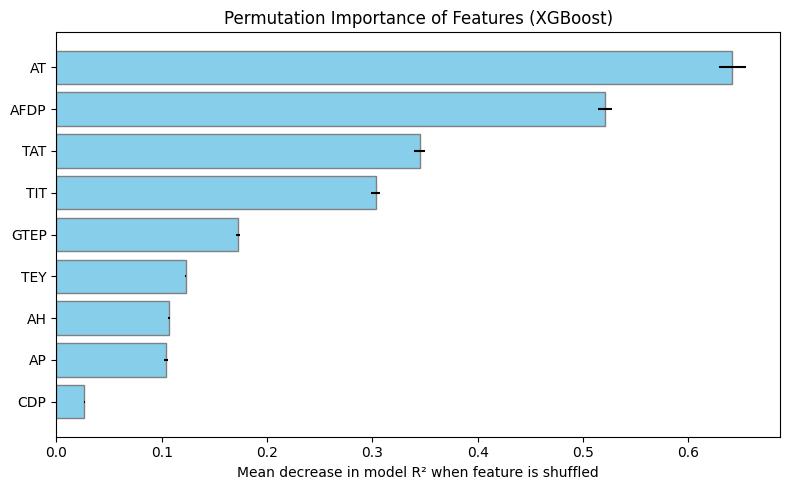

,Feature,Importance_Mean,Importance_STD
5,AT,0.641610,0.012530
4,AFDP,0.520857,0.006673
1,TAT,0.344795,0.004971
0,TIT,0.302949,0.004079
3,GTEP,0.172635,0.001828
8,TEY,0.122584,0.000916
7,AH,0.106746,0.000734
6,AP,0.104081,0.001521
2,CDP,0.026645,0.000382


In [37]:
# ----------------------------------------------------------
# Permutation Importance Interpretation (XGBoost tuned model)
# ----------------------------------------------------------
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor

# tuned model
best_params = {
    'n_estimators': 707,
    'max_depth': 14,
    'learning_rate': 0.02584254293939023,
    'subsample': 0.7767985942616596,
    'colsample_bytree': 0.9509850175210535,
    'min_child_weight': 8,
    'gamma': 1.1123143383425143,
    'reg_lambda': 5.098818953966899,
    'random_state': 42,
    'n_jobs': -1
}

X = df[['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']]
y = df['NOX']

model = XGBRegressor(**best_params)
model.fit(X, y)

# ----------------------------------------------------------
# Compute permutation importance
# ----------------------------------------------------------
perm = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': perm.importances_mean,
    'Importance_STD': perm.importances_std
}).sort_values(by='Importance_Mean', ascending=True)

# ----------------------------------------------------------
# Plot
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
plt.barh(imp_df['Feature'], imp_df['Importance_Mean'], xerr=imp_df['Importance_STD'], color='skyblue', edgecolor='gray')
plt.xlabel('Mean decrease in model R² when feature is shuffled')
plt.title('Permutation Importance of Features (XGBoost)')
plt.tight_layout()
plt.show()

# Display ranked importance table
imp_df.sort_values(by='Importance_Mean', ascending=False)


| Rank                                           | Variable                                                                                                     | Interpretation |
| ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------ | -------------- |
| **1. AT (Ambient Temperature)**                | Strongest driver of NOx. Changes in ambient temperature heavily influence combustion and emission formation. |                |
| **2. AFDP (Air Filter Differential Pressure)** | Indicates airflow restriction; as filters clog, NOx levels shift significantly.                              |                |
| **3. TAT (Turbine Exhaust Temperature)**       | A key thermal signal tied to combustion efficiency and NOx formation.                                        |                |
| **4. TIT (Turbine Inlet Temperature)**         | Also central to combustion control but less dominant than external/airflow factors.                          |                |
| **5. GTEP (Exhaust Pressure)**                 | Moderate influence, tied to exhaust back pressure and airflow.                                               |                |
| **6–9. TEY, AH, AP, CDP**                      | Secondary effects. Load (TEY) matters but less than environmental and pressure factors.                      |                |


   Fold        R²       MAE
0     1  0.875167  2.556871
1     2  0.887232  2.599763
2     3  0.878123  2.567187
3     4  0.892346  2.531699
4     5  0.897002  2.534389

Mean R²: 0.886 ± 0.0083
Mean MAE: 2.558 ± 0.0248


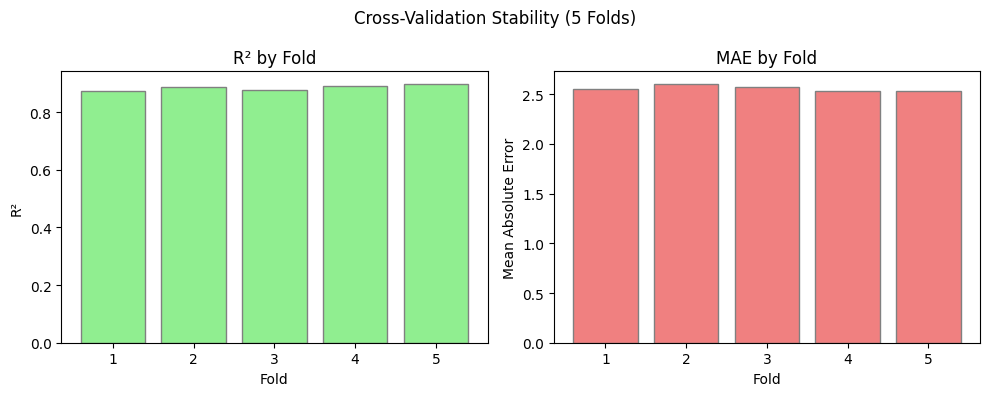

In [38]:


# ----------------------------------------------------------
# 5-Fold Cross Validation
# ----------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores, mae_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# ----------------------------------------------------------
# Summarize Results
# ----------------------------------------------------------
cv_results = pd.DataFrame({'Fold': np.arange(1, 6), 'R²': r2_scores, 'MAE': mae_scores})
print(cv_results)
print("\nMean R²:", np.mean(r2_scores).round(4), "±", np.std(r2_scores).round(4))
print("Mean MAE:", np.mean(mae_scores).round(4), "±", np.std(mae_scores).round(4))

# ----------------------------------------------------------
# Visualization
# ----------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(cv_results['Fold'], cv_results['R²'], color='lightgreen', edgecolor='gray')
ax[0].set_title('R² by Fold')
ax[0].set_xlabel('Fold')
ax[0].set_ylabel('R²')

ax[1].bar(cv_results['Fold'], cv_results['MAE'], color='lightcoral', edgecolor='gray')
ax[1].set_title('MAE by Fold')
ax[1].set_xlabel('Fold')
ax[1].set_ylabel('Mean Absolute Error')

plt.suptitle('Cross-Validation Stability (5 Folds)')
plt.tight_layout()
plt.show()


| Metric                      | Value                                                                | Meaning                                           |
| --------------------------- | -------------------------------------------------------------------- | ------------------------------------------------- |
| **Mean R² = 0.886 ± 0.008** | Model explains ~89 % of NOx variation, variation across folds < 1 %. | Excellent fit and **very stable** generalization. |
| **Mean MAE = 2.56 ± 0.02**  | Typical prediction error ≈ ± 2.6 NOx units.                          | Low, consistent error across all folds.           |


| Category                              | Example        | Why                                                                                                                       |
| ------------------------------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Controllable (actionable)**         | TIT, AFDP      | Operators or maintenance can directly change them (through set-points or filter cleaning).                                |
| **Semi-controllable / environmental** | AT             | External but measurable and affects emissions; used to test robustness.                                                   |
| **Derived or passive**                | CDP, GTEP, TEY | Usually downstream outcomes or tightly coupled to other controls; changing them independently breaks physics consistency. |


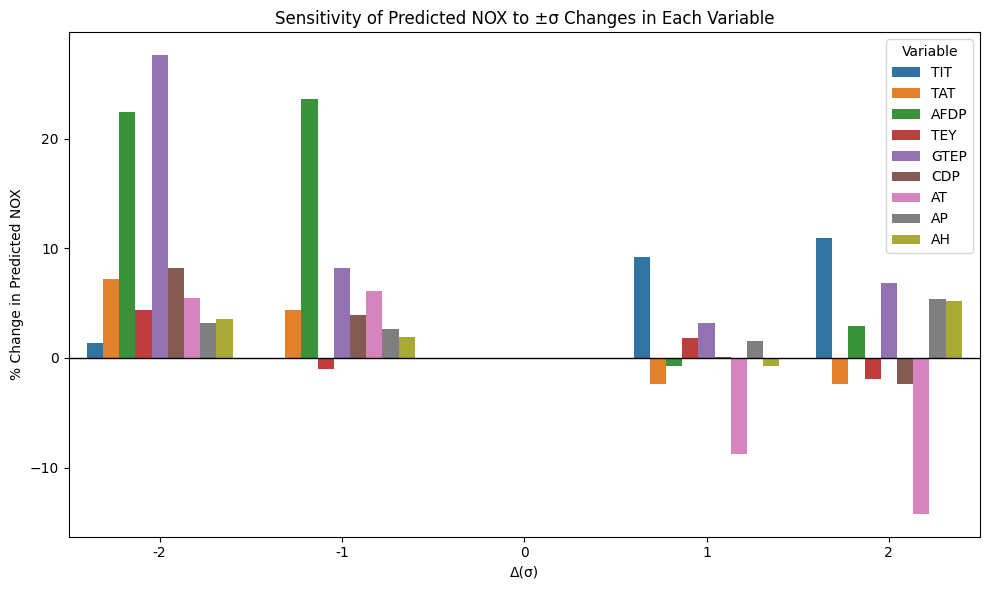

Std_%Δ_NOX  Std_ΔNOX
Group             Variable                      
Controllable      AFDP       12.288518  7.611908
Semi-controllable GTEP       10.808574  6.695182
Passive           AT          8.936102  5.535312
Controllable      TIT         5.335506  3.304986
                  TAT         4.258660  2.637952
Semi-controllable CDP         4.166043  2.580583
                  TEY         2.505816  1.552184
Passive           AH          2.461373  1.524654
                  AP          2.011716  1.246122

In [39]:
# -----------------------------
# Feature groups
# -----------------------------
controllable = ['TIT', 'TAT', 'AFDP']          # can be tuned / maintained
semi_controllable = ['TEY', 'GTEP', 'CDP']     # indirectly influenced
passive = ['AT', 'AP', 'AH']                   # ambient/environmental

X = df[controllable + semi_controllable + passive]
y = df['NOX']

model = XGBRegressor(**best_params)
model.fit(X, y)

# -----------------------------
# Base case = mean operating point
# -----------------------------
base_case = X.mean().to_frame().T
base_pred = model.predict(base_case)[0]

# -----------------------------
# Data-driven deltas (±1σ, ±2σ)
# -----------------------------
stds = X.std()

results = []
for group, features in {
    'Controllable': controllable,
    'Semi-controllable': semi_controllable,
    'Passive': passive
}.items():
    for var in features:
        for mult in [-2, -1, 0, 1, 2]:
            test = base_case.copy()
            test[var] = base_case[var].values[0] + mult * stds[var]
            pred = model.predict(test)[0]
            diff = pred - base_pred
            pct = 100 * diff / base_pred
            results.append([group, var, mult, pred, diff, pct])

sim_df = pd.DataFrame(results,
    columns=['Group','Variable','Δ(σ)','Pred_NOX','ΔNOX','%Δ_NOX'])

# -----------------------------
# Plot sensitivities
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=sim_df, x='Δ(σ)', y='%Δ_NOX', hue='Variable')
plt.axhline(0, color='black', lw=1)
plt.title('Sensitivity of Predicted NOX to ±σ Changes in Each Variable')
plt.ylabel('% Change in Predicted NOX')
plt.tight_layout()
plt.show()

# Group-level summary table
summary = (
    sim_df.groupby(['Group','Variable'])
    .agg({'%Δ_NOX':'std','ΔNOX':'std'})
    .rename(columns={'%Δ_NOX':'Std_%Δ_NOX','ΔNOX':'Std_ΔNOX'})
    .sort_values('Std_%Δ_NOX', ascending=False)
)
summary


| Observation                                                      | Meaning                                                                                                                                                            |
| ---------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **AFDP and GTEP** have the largest positive bars for –1σ and –2σ | When those values *decrease* (filters cleaner, lower exhaust pressure), predicted NOx **rises** sharply. That’s a red flag — the model sees non-linear dependence. |
| **AT** has strong negative response on +1σ and +2σ               | Higher ambient temperatures reduce NOx — consistent with your EDA correlation.                                                                                     |
| **TIT** shows a steady upward slope                              | Increasing turbine inlet temperature increases NOx moderately.                                                                                                     |
| **TAT** small mixed effects                                      | Indicates temperature balance downstream has weaker but still noticeable role.                                                                                     |


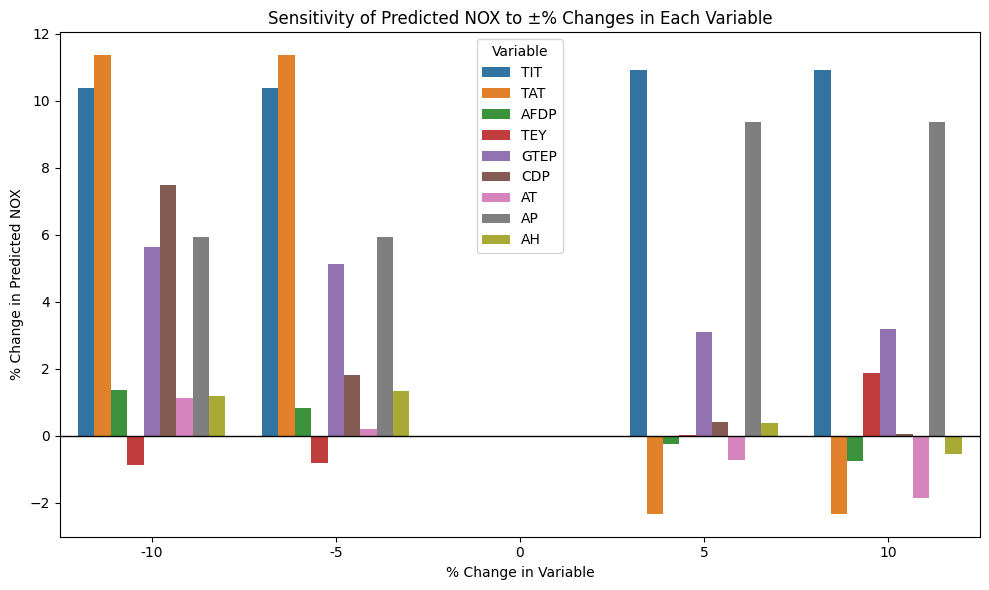

Std_%Δ_NOX  Std_ΔNOX
Group             Variable                      
Controllable      TAT         7.139691  4.422557
                  TIT         4.775497  2.958098
Passive           AP          3.823611  2.368469
Semi-controllable CDP         3.173572  1.965814
                  GTEP        2.223608  1.377375
Passive           AT          1.115697  0.691099
Semi-controllable TEY         1.108761  0.686803
Controllable      AFDP        0.848367  0.525506
Passive           AH          0.796860  0.493601

In [40]:
# ----------------------------------------------------------
# Percentage-based sensitivity simulation (±5%, ±10%)
# ----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# -----------------------------
# Feature groups
# -----------------------------
controllable = ['TIT', 'TAT', 'AFDP']          # directly tunable / maintainable
semi_controllable = ['TEY', 'GTEP', 'CDP']     # indirectly influenced
passive = ['AT', 'AP', 'AH']                   # ambient/environmental

X = df[controllable + semi_controllable + passive]
y = df['NOX']

model = XGBRegressor(**best_params)
model.fit(X, y)

# -----------------------------
# Base case = mean operating point
# -----------------------------
base_case = X.mean().to_frame().T
base_pred = model.predict(base_case)[0]

# -----------------------------
# Percentage-based deltas (±5%, ±10%)
# -----------------------------
results = []
for group, features in {
    'Controllable': controllable,
    'Semi-controllable': semi_controllable,
    'Passive': passive
}.items():
    for var in features:
        for pct_change in [-10, -5, 0, 5, 10]:
            test = base_case.copy()
            test[var] = base_case[var].values[0] * (1 + pct_change / 100)
            pred = model.predict(test)[0]
            diff = pred - base_pred
            pct_NOX = 100 * diff / base_pred
            results.append([group, var, pct_change, pred, diff, pct_NOX])

sim_df = pd.DataFrame(results,
    columns=['Group','Variable','%Change_Var','Pred_NOX','ΔNOX','%Δ_NOX'])

# -----------------------------
# Plot sensitivities
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=sim_df, x='%Change_Var', y='%Δ_NOX', hue='Variable')
plt.axhline(0, color='black', lw=1)
plt.title('Sensitivity of Predicted NOX to ±% Changes in Each Variable')
plt.ylabel('% Change in Predicted NOX')
plt.xlabel('% Change in Variable')
plt.tight_layout()
plt.show()

# -----------------------------
# Group-level summary table
# -----------------------------
summary = (
    sim_df.groupby(['Group','Variable'])
    .agg({'%Δ_NOX':'std','ΔNOX':'std'})
    .rename(columns={'%Δ_NOX':'Std_%Δ_NOX','ΔNOX':'Std_ΔNOX'})
    .sort_values('Std_%Δ_NOX', ascending=False)
)
summary


| Variable                                | Sensitivity pattern                              | Interpretation                                                                              |
| --------------------------------------- | ------------------------------------------------ | ------------------------------------------------------------------------------------------- |
| **TIT (Turbine Inlet Temp)**            | Strong positive both sides (≈ +10 %)             | Higher TIT → higher combustion temp → higher NOx. Physically consistent.                    |
| **TAT (Turbine After Temp)**            | Same direction, also positive                    | Hotter exhaust path maintains high NOx formation; tightly linked with TIT.                  |
| **AFDP (Air Filter ΔP)**                | Small positive at negatives, near 0 at positives | Cleaner filters (lower ΔP) slightly raise NOx by allowing richer combustion; effect modest. |
| **TEY (Load / Efficiency)**             | Slight negative                                  | Higher load mildly lowers NOx — suggests efficient burn under stable high-load conditions.  |
| **GTEP (Gas Turbine Exhaust Pressure)** | Mild positive                                    | More back-pressure → less efficient exhaust → higher NOx.                                   |
| **CDP (Compressor Discharge Pressure)** | Moderate positive                                | Denser air → hotter flame → slight NOx increase.                                            |
| **AT (Ambient Temp)**                   | Clear negative                                   | Hotter ambient air → lower NOx (due to reduced oxygen density).                             |
| **AP (Ambient Pressure)**               | Strong positive                                  | Higher atmospheric pressure → higher air mass flow → more NOx.                              |
| **AH (Humidity)**                       | Small negative                                   | Higher humidity reduces NOx (water vapor cools combustion).                                 |


| Group                                  | Main Drivers              | Behavior                                     | Implication                                    |
| -------------------------------------- | ------------------------- | -------------------------------------------- | ---------------------------------------------- |
| **Controllable (TIT, TAT, AFDP)**      | Strong, direct, nonlinear | Best levers for tuning                       | Fine-tune TIT / TAT; keep AFDP in nominal band |
| **Semi-Controllable (TEY, GTEP, CDP)** | Moderate, mixed direction | Operational load and pressure balance matter | Stabilize pressures; avoid transients          |
| **Passive (AT, AP, AH)**               | Environmental influences  | Predictable, not adjustable                  | Build weather-adjusted NOx correction factor   |


Test R²=0.874  MAE=2.565  RMSE=4.205  MAPE=3.89%


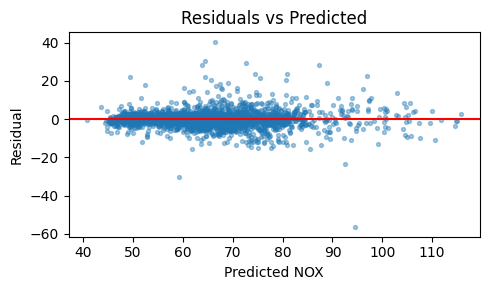

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

# --- data ---
FEATURES = ['TIT','TAT','CDP','GTEP','AFDP','AT','AP','AH','TEY']
X = df[FEATURES]; y = df['NOX']

# --- tuned XGB ---
from xgboost import XGBRegressor
best_params = {
    'n_estimators': 707, 'max_depth': 14, 'learning_rate': 0.02584254293939023,
    'subsample': 0.7767985942616596, 'colsample_bytree': 0.9509850175210535,
    'min_child_weight': 8, 'gamma': 1.1123143383425143, 'reg_lambda': 5.098818953966899,
    'random_state': 42, 'n_jobs': -1
}
model = XGBRegressor(**best_params)

# --- 80/20 split for a clean report metric ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
model.fit(Xtr, ytr)
pred = model.predict(Xte)

r2  = r2_score(yte, pred)
mae = mean_absolute_error(yte, pred)
rmse = np.sqrt(mean_squared_error(yte, pred))
mape= (abs((yte - pred)/yte).replace([np.inf,-np.inf], np.nan).dropna().mean())*100
print(f"Test R²={r2:.3f}  MAE={mae:.3f}  RMSE={rmse:.3f}  MAPE={mape:.2f}%")

import matplotlib.pyplot as plt

res = yte - pred

plt.figure(figsize=(5, 3))
plt.scatter(pred, res, s=8, alpha=0.4)
plt.axhline(0, color='r')
plt.xlabel("Predicted NOX")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()



In [44]:
# fit on all data for deployment
model.fit(X, y)

# save model + metadata
import joblib, json, time, os
os.makedirs("artifacts", exist_ok=True)

joblib.dump(model, "artifacts/nox_xgb_v1.joblib")

meta = {
    "model_name": "NOX_XGB",
    "version": 1,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
    "features": FEATURES,
    "best_params": best_params,
    "train_rows": int(len(X))
}
with open("artifacts/model_info.json","w") as f: json.dump(meta, f, indent=2)

print("Saved: artifacts/nox_xgb_v1.joblib and artifacts/model_info.json")


Saved: artifacts/nox_xgb_v1.joblib and artifacts/model_info.json


In [45]:
import joblib, json, pandas as pd
mdl = joblib.load("artifacts/nox_xgb_v1.joblib")
info = json.load(open("artifacts/model_info.json"))
assert info["features"] == FEATURES

# example payload (must include all features, same order/names)
example = pd.DataFrame([{
    "TIT":1075, "TAT":540, "CDP":12.5, "GTEP":27.5, "AFDP":3.1,
    "AT":18.0, "AP":1012.0, "AH":55.0, "TEY":150.0
}])[FEATURES]

print("Predicted NOX:", float(mdl.predict(example)[0]))


Predicted NOX: 74.5975112915039


In [46]:
# api.py
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd, joblib, json

FEATURES = json.load(open("artifacts/model_info.json"))["features"]
model = joblib.load("artifacts/nox_xgb_v1.joblib")

class Sample(BaseModel):
    TIT: float; TAT: float; CDP: float; GTEP: float; AFDP: float
    AT: float; AP: float; AH: float; TEY: float

app = FastAPI()

@app.post("/predict")
def predict(item: Sample):
    X = pd.DataFrame([item.dict()])[FEATURES]
    yhat = float(model.predict(X)[0])
    return {"NOX_pred": yhat}

# run: uvicorn api:app --host 0.0.0.0 --port 8000
